In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cp_from_params(torque = None, omega = None, density = None, area = None, wind_velocity = None, ct = None, tip_speed_ratio = None):
    if torque != None and omega != None and density != None and area != None and wind_velocity != None:
        return torque*omega/(0.5*density*area*(wind_velocity**3))
    elif ct != None and tip_speed_ratio != None:
        return ct*tip_speed_ratio
    else:
        raise Exception("Incompatible parameters")

In [3]:
def ct_from_params(torque = None, omega = None, density = None, area = None, wind_velocity = None, radius = None, cp = None, tip_speed_ratio = None):
    if torque != None and omega != None and density != None and area != None and wind_velocity != None and radius != None:
        return torque/(0.5*density*area*(wind_velocity**2)*radius)
    elif cp != None and tip_speed_ratio != None:
        return cp/tip_speed_ratio
    else:
        raise Exception("Incompatible parameters")

In [4]:
def available_power(density, area, wind_velocity):
    return 0.5*density*area*(wind_velocity**3)

In [5]:
def ideal_cp(tip_speed_ratio):
    return 16/27*np.exp(-0.35*tip_speed_ratio**-1.29)

In [6]:
def max_cp(tip_speed_ratio, n_blades, phi, cd, cl):
    return 16/27*((1-1.386/n_blades*np.sin(phi/2))**2)*(np.exp(-0.35*tip_speed_ratio**-1.29)-cd/cl*tip_speed_ratio)

In [7]:
def betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius):
    return 16*np.pi*max_radius/(9*n_blades*tip_speed_ratio*cl*np.sqrt(4/9+(tip_speed_ratio*radius)**2/(max_radius**2)))

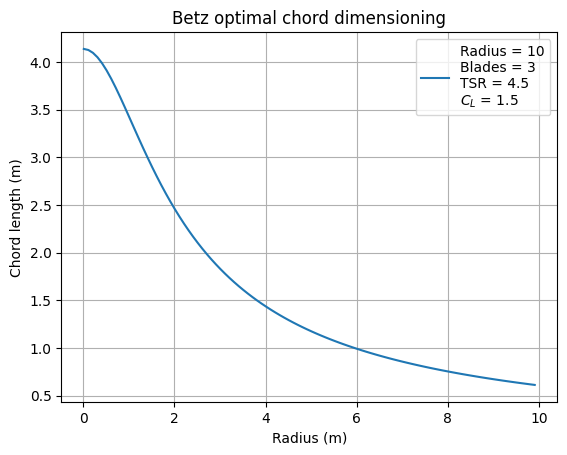

In [8]:
max_radius = 10
n_blades = 3
tip_speed_ratio = 4.5
cl = 1.5
radius = np.arange(0.01, 10, 0.1)
chord_betz = betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_betz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Betz optimal chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()

In [9]:
def schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius):
    return 16*np.pi*radius*(np.sin(np.arctan(max_radius/(tip_speed_ratio*radius))/3)**2)/(n_blades*cl)

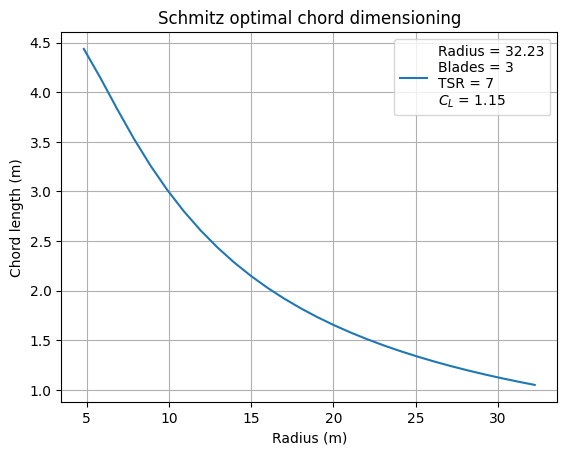

In [13]:
max_radius = 32.23
min_radius = 4.8345
n_blades = 3
tip_speed_ratio = 7
cl = 1.15
radius = np.linspace(min_radius, max_radius, 28)
chord_schmitz = schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_schmitz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Schmitz optimal chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()

In [25]:
len(radius-4.8345)

28

In [26]:
list(zip(radius, chord_schmitz))

[(4.8345, 4.436169794607235),
 (5.849148148148148, 4.142075895074553),
 (6.863796296296297, 3.829345685199733),
 (7.878444444444445, 3.5307069376947755),
 (8.893092592592593, 3.258095266618927),
 (9.907740740740742, 3.0141402155078785),
 (10.92238888888889, 2.7975772197195217),
 (11.937037037037037, 2.6057221080817596),
 (12.951685185185186, 2.435567465461242),
 (13.966333333333333, 2.28424143483495),
 (14.980981481481482, 2.149175425411878),
 (15.995629629629631, 2.028142218845442),
 (17.01027777777778, 1.9192395496900234),
 (18.024925925925928, 1.8208537386647583),
 (19.039574074074075, 1.731618905476482),
 (20.054222222222222, 1.6503783289599387),
 (21.06887037037037, 1.5761503511741353),
 (22.083518518518517, 1.508099333483455),
 (23.098166666666664, 1.4455113706931098),
 (24.11281481481482, 1.3877741784476678),
 (25.127462962962966, 1.3343605112766208),
 (26.142111111111113, 1.2848145099901032),
 (27.15675925925926, 1.2387404540605034),
 (28.171407407407408, 1.1957934780488575),
 

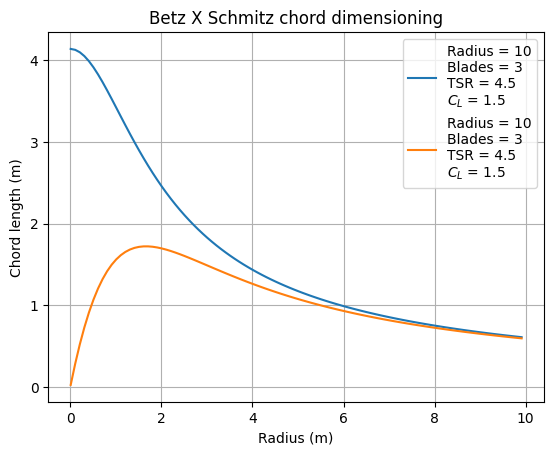

In [11]:
chord_betz = betz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_betz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
chord_schmitz = schmitz_chord_dimensioning(max_radius, n_blades, tip_speed_ratio, cl, radius)
plt.plot(radius, chord_schmitz, label=f"Radius = {max_radius}\nBlades = {n_blades}\nTSR = {tip_speed_ratio}\n$C_L$ = {cl}")
plt.title("Betz X Schmitz chord dimensioning")
plt.xlabel("Radius (m)")
plt.ylabel("Chord length (m)")
plt.legend()
plt.grid()
plt.show()